<a href="https://colab.research.google.com/github/KHakesh07/CIFAR10-Dataset-Classifier-CNN/blob/main/Cifar10_Data_Prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
print("imported all")

imported all


In [ ]:
#loading dataset from keras and classifying into train and test.
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

#not=rmalizing the training data
train_images, test_images = train_images/255.0, test_images/255.0
print("Normalization of training data is done")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Normalization of training data is done


EXPLORE OUR DATASET

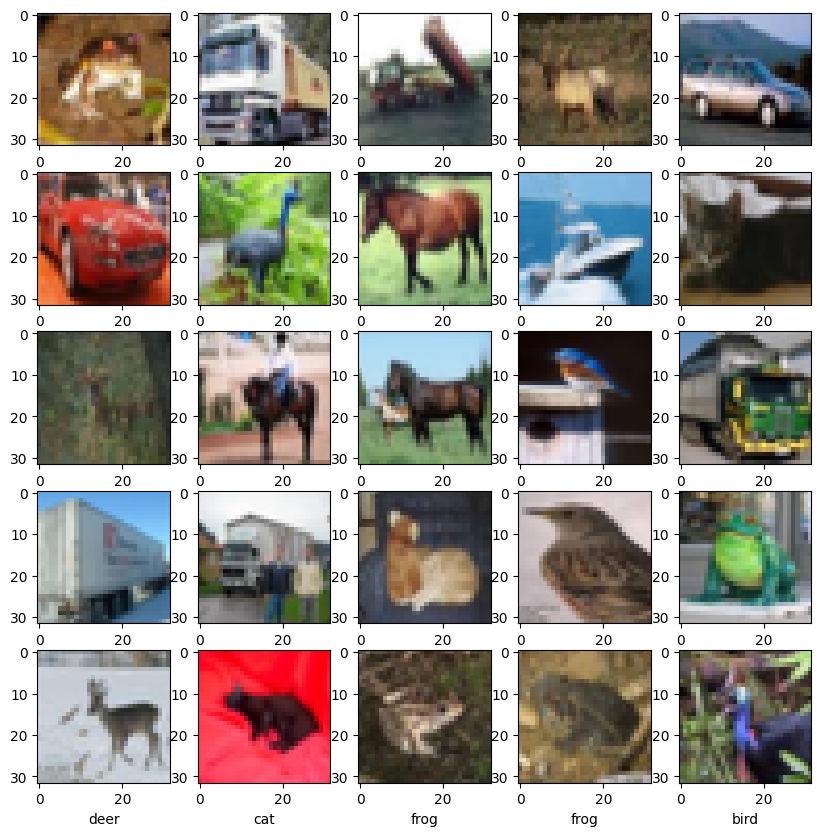

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

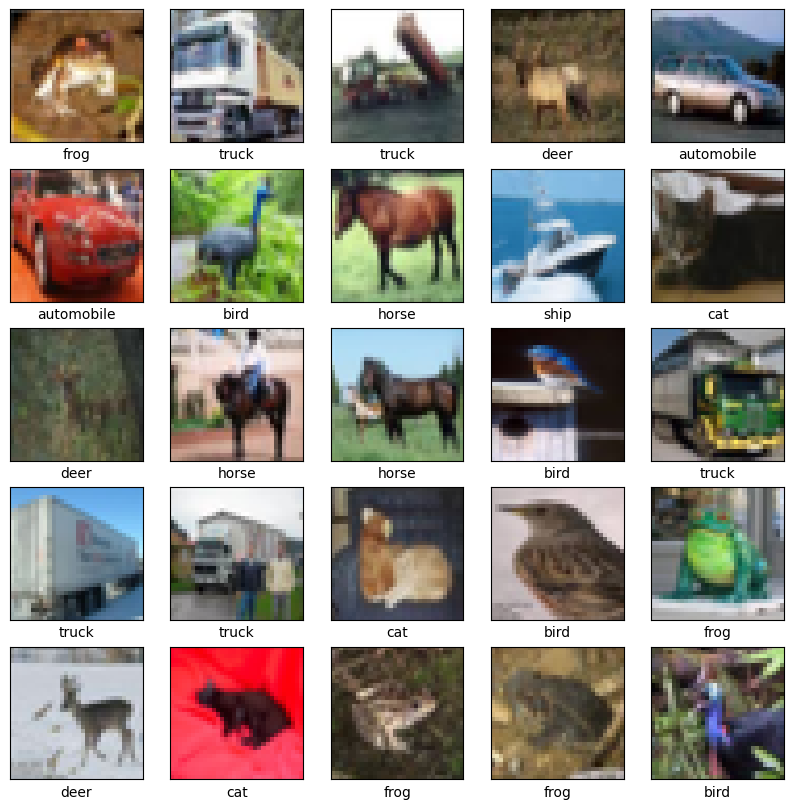

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
#Conv2D is a 2D Convolution Layer that is used to learn features or patterns in an input image by applying a set of learnable filters on the input image
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#MaxPooling2D reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#flatten the 3d output to 1d
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#architecture of our model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = model.fit(train_images,train_labels, epochs=3, validation_data=(test_images,test_labels))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7573 - loss: 0.6920 - val_accuracy: 0.7132 - val_loss: 0.8499
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7781 - loss: 0.6364 - val_accuracy: 0.7085 - val_loss: 0.8870
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7883 - loss: 0.5976 - val_accuracy: 0.7145 - val_loss: 0.8477


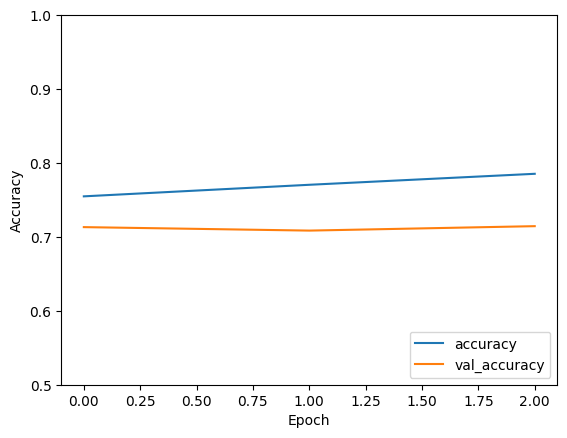

313/313 - 3s - 11ms/step - accuracy: 0.7145 - loss: 0.8477
Test loss: 0.847670316696167
Test accuracy: 0.7145000100135803


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

In [ ]:
predictions = model.predict(test_images)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [ ]:
print("Predicted classes:", predictions[:10])
print("Actual labels:", test_labels[:10].flatten())

Predicted classes: [[1.24863524e-03 1.08437540e-04 5.35985045e-02 7.62556314e-01
  2.95881648e-04 7.81824812e-02 1.00150779e-01 1.44144485e-03
  2.14761752e-03 2.69856886e-04]
 [5.90505195e-04 1.18377425e-01 9.43331600e-08 1.95568841e-08
  2.70460598e-10 6.25958119e-10 1.28816824e-09 7.48182419e-11
  8.80117118e-01 9.14738514e-04]
 [2.46580437e-01 2.00983137e-01 7.26317242e-03 5.18785743e-03
  6.01671985e-04 8.21902824e-04 6.66276974e-05 1.47122727e-03
  2.48413458e-01 2.88610399e-01]
 [9.25039768e-01 4.56622541e-02 1.65052013e-03 1.20753411e-03
  3.70346650e-04 5.98123996e-04 1.28416968e-05 1.38073438e-03
  2.35983450e-02 4.79455543e-04]
 [3.14077647e-06 1.05852105e-05 2.31066253e-02 3.06845233e-02
  7.31904507e-01 1.71884079e-03 2.12318376e-01 2.28590179e-05
  2.24486852e-04 6.12889107e-06]
 [2.91509332e-05 7.21402012e-06 1.37716602e-03 3.14485766e-02
  1.06120214e-03 3.15549783e-02 9.32469726e-01 9.26898560e-04
  2.26945986e-06 1.12277165e-03]
 [3.37848882e-03 8.16888988e-01 1.58493

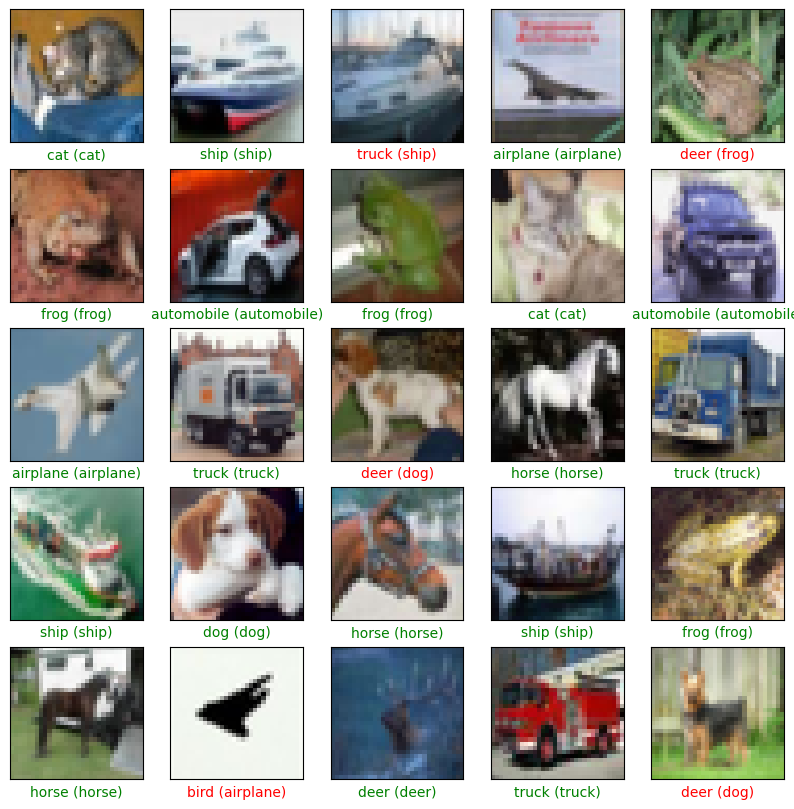

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

plt.show()